In [2]:
import pandas as pd
import numpy as np
from datetime import date
from dateutil.relativedelta import relativedelta

In [3]:
df = pd.read_csv('../data/data_rfm.csv', header=0)[['usuario_id_crp', 'year_month','freq_all_1', 'mon_all_1']]

In [4]:
df.head()

,usuario_id_crp,year_month,freq_all_1,mon_all_1
0,11,2020-05-01,4,36772.0
1,11,2020-06-01,1,1090.0
2,11,2020-07-01,2,14080.0
3,11,2020-08-01,6,60800.0
4,11,2020-09-01,6,59314.0


In [5]:
start_date = date(2020,3,1)
max_date =  date(2022,5,1)
minimum_windows_size = 12

rolling = False

start_train = start_date
end_train = start_train + relativedelta(months=minimum_windows_size) #- relativedelta(days=1)
test = start_train + relativedelta(months=minimum_windows_size+1)

while test <= max_date:
    
    # Set dates
    if rolling == True:
        start_train += relativedelta(months=1)
    
    end_train += relativedelta(months=1)
    test += relativedelta(months=1)
    
    print(start_train, end_train, test)

    # Filtrate DataFrame
    df_train = df[(df['year_month'] >= start_train.strftime('%Y-%m-%d')) & (df['year_month'] <= end_train.strftime('%Y-%m-%d'))]
    df_test = df[df['year_month'] == test.strftime('%Y-%m-%d')]
    
    # Grouping Data
    df_train = df_train.groupby('usuario_id_crp').sum()
    df_test = df_test.groupby('usuario_id_crp').sum()
    
    #     
    df_train['avg_tk'] = df_train['mon_all_1'] / df_train['freq_all_1']
    df_test['avg_tkv'] = df_test['mon_all_1'] / df_test['freq_all_1']
    
    df_train['freq_rank'] = df_train['freq_all_1'].rank(ascending=True)
    df_train['mon_rank'] = df_train['mon_all_1'].rank(ascending=True)
    df_train['avg_rank'] = df_train['avg_tk'].rank(ascending=True)

    df_train['freq_rank_norm'] = (df_train['freq_rank'] / df_train['freq_rank'].max())*100
    df_train['mon_rank_norm'] = (df_train['mon_rank'] / df_train['mon_rank'].max())*100
    df_train['avg_rank_norm'] = (df_train['avg_rank'] / df_train['avg_rank'].max())*100
    
    # Drop year_month
    df_train.drop(columns=['freq_all_1','mon_all_1','avg_tk','freq_rank','mon_rank','avg_rank'], axis=1,inplace=True)
    #df_test.drop(columns='year_month', inplace=True)
    
    
    
    #df_train = df_train[df_train['freq_all_1'] != 1]

2020-03-01 2021-04-01 2021-05-01
2020-03-01 2021-05-01 2021-06-01
2020-03-01 2021-06-01 2021-07-01
2020-03-01 2021-07-01 2021-08-01
2020-03-01 2021-08-01 2021-09-01
2020-03-01 2021-09-01 2021-10-01
2020-03-01 2021-10-01 2021-11-01
2020-03-01 2021-11-01 2021-12-01
2020-03-01 2021-12-01 2022-01-01
2020-03-01 2022-01-01 2022-02-01
2020-03-01 2022-02-01 2022-03-01
2020-03-01 2022-03-01 2022-04-01
2020-03-01 2022-04-01 2022-05-01
2020-03-01 2022-05-01 2022-06-01


In [6]:
df_train

,freq_rank_norm,mon_rank_norm,avg_rank_norm
usuario_id_crp,,,
11,98.888262,97.860598,49.745309
22,99.993076,99.994065,73.900873
31,96.511973,96.133646,64.398683
158,97.176642,96.869529,65.701315
183,99.947578,99.768553,42.226245
...,...,...,...
3195562,28.927925,36.575571,52.964304
3195577,28.927925,47.464467,69.490520
3195602,28.927925,47.464467,69.490520


In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

# Escalar Valores
scaler = MinMaxScaler()
scaler.fit(df_train)
df_scaled = scaler.transform(df_train)

NameError: name 'df_train' is not defined

In [7]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans

# Calcular numero de clusters
range_n_clusters = list(range(2,11))
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=20220720)
    
    cluster_labels = clusterer.fit_predict(df_scaled)
    
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

For n_clusters = 2 The average silhouette_score is : 0.5334101678102574
For n_clusters = 3 The average silhouette_score is : 0.5551581638805622
For n_clusters = 4 The average silhouette_score is : 0.5373253448396494
For n_clusters = 5 The average silhouette_score is : 0.5019781930778472
For n_clusters = 6 The average silhouette_score is : 0.5025735712439753
For n_clusters = 7 The average silhouette_score is : 0.5126373820518123
For n_clusters = 8 The average silhouette_score is : 0.5088941964776695
For n_clusters = 9 The average silhouette_score is : 0.5092009826771603
For n_clusters = 10 The average silhouette_score is : 0.5051148126122313


[0.61407322 0.60156084 0.63266102 ... 0.72375449 0.73703328 0.69515859]
Para n_clusters = 3 el coeficiente promedio de silhouette_score es: 0.5551581638805622


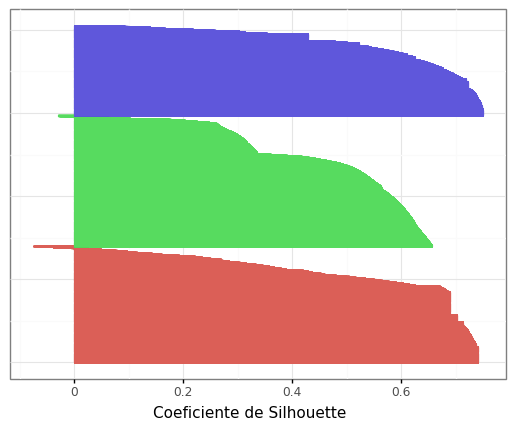

<ggplot: (139042626570)>

In [9]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from plotnine import *

km = KMeans(n_clusters=3, random_state=20220720)
km = km.fit(df_scaled)

#Calculando el coeficiente de Silhouette para cada muestra
sample_silhouette_values = silhouette_samples(df_scaled, km.labels_)
print(sample_silhouette_values)

#Calculando el coeficiente de silhouette promedio
silhouette_avg = silhouette_score(df_scaled, km.labels_)
print("Para n_clusters =", 3,"el coeficiente promedio de silhouette_score es:", silhouette_avg)

#Visualizando los coeficientes de Silhouette
tempDF = pd.DataFrame(columns=['SC','labels'])
for i in range(km.n_clusters):
    #Ordenando los valores de cada cluster
    tempData=np.sort(sample_silhouette_values[km.labels_==i])[::-1]#para mostrarlos de menor a mayor
    tempDF2=pd.DataFrame(tempData,columns=["SC"])
    tempDF2["labels"]=i
    #Agregandolo a un nuevo data frame
    tempDF=tempDF.append(tempDF2)
    
tempDF.reset_index()

(ggplot(tempDF)+aes(y="SC",x=range(tempDF.shape[0]),color="factor(labels)")
 +geom_col(show_legend=False)+coord_flip()+theme_bw()
 +labs(y="Coeficiente de Silhouette")+theme(axis_text_y=element_blank(),axis_ticks_major_y=element_blank())
)

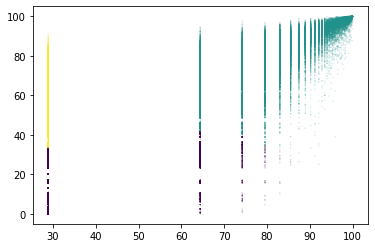

In [13]:
import matplotlib.pyplot as plt

plt.scatter(x=df_train.iloc[:,0], y=df_train.iloc[:,1],s=0.01, c=km.labels_)
plt.show()

In [15]:
df_train['cluster'] = km.labels_

In [18]:
df_train.to_csv('data_clusterRFM.csv')

In [17]:
km.labels_

array([1, 1, 1, ..., 2, 2, 2])

In [19]:
df_train

,freq_rank_norm,mon_rank_norm,avg_rank_norm,cluster
usuario_id_crp,,,,
11,98.888262,97.860598,49.745309,1
22,99.993076,99.994065,73.900873,1
31,96.511973,96.133646,64.398683,1
158,97.176642,96.869529,65.701315,1
183,99.947578,99.768553,42.226245,1
...,...,...,...,...
3195562,28.927925,36.575571,52.964304,2
3195577,28.927925,47.464467,69.490520,2
3195602,28.927925,47.464467,69.490520,2


In [21]:
# Filtrate DataFrame
df_train = df[(df['year_month'] >= start_train.strftime('%Y-%m-%d')) & (df['year_month'] <= end_train.strftime('%Y-%m-%d'))]
df_test = df[df['year_month'] == test.strftime('%Y-%m-%d')]

# Grouping Data
df_train = df_train.groupby('usuario_id_crp').sum()
df_test = df_test.groupby('usuario_id_crp').sum()

#     
df_train['avg_tk'] = df_train['mon_all_1'] / df_train['freq_all_1']
df_test['avg_tkv'] = df_test['mon_all_1'] / df_test['freq_all_1']


In [22]:
df_train['cluster'] = km.labels_

In [24]:
df_train.to_csv('data_clusterRFM.csv')